### Measures of center and spread
In this unit, we take a look at some of the most popular choices of statistics. Computing these statistics forms the numerical part of the exploratory data analysis concept that we introduced in the first course.

#### Measures of center
The center helps us quickly make an approximation about the data itself. 
What we usually refer to as the average is the arithmetic mean and is found by adding up all the values and diving by the total number of values.

Let’s look at an example:

In [1]:
import numpy as np

val = [78, 75, 82, 70]
np.mean(val)

76.25

Using NumPy’s mean function we computed the mean of our list of numbers to be 
76.25
. This seems to make sense since all the values are around this mean. But suppose we added a new value to our list and recomputed the mean

In [2]:
val2 = [78, 75, 82, 70, 10]
np.mean(val2)

63.0

 the mean is easily affected by outliers. Another concept of the center which is less affected by outliers is the median. The median is obtained by sorting the dataset and then taking the value which is in the middle. If the dataset has an odd number of entries that this will be a unique value. If the dataset has an even number of entries then there will be two values in the middle and the median is defined as their average in this case.

In [3]:
np.median(val)


76.5

In [4]:
np.median(val2)

75.0

#### Measures of variation

After determining the center of a dataset the second most common question is to look at the spread of the data. In particular, how far away can the points be from the center? For this let’s introduce a list with more values

In [5]:
val3 = [94, 66, 51, 8, 10, 34, 69, 21, 49, 16, 21, 83, 44, 69, 29, 7, 26,
        77, 90, 53, 58, 84, 45, 14, 41, 7, 47, 86, 24, 48, 71, 71, 34, 86,
        52, 17, 8, 84, 41, 70, 61, 85, 6, 14, 58, 12, 99, 81, 16, 93]

The first thing we can look at is the range which is just the difference between the maximum and minimum values

In [6]:
np.max(val3) - np.min(val3)

93

Both the variance and the standard deviation are a measure of how far away the data points are from the mean. We can compute them easily in Python using the following functions from NumPy

In [7]:
print(np.mean(val3))
print(np.var(val3))
print(np.std(val3))

48.6
828.8400000000001
28.78958144885056


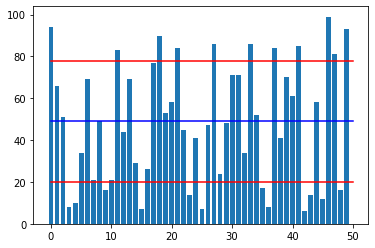

In [8]:
# For this we will need to include the usual import statements
import matplotlib.pyplot as plt
%matplotlib inline
# Let’s now make a bar chart of our values, and also plot the mean together with upper and lower limits given by the standard deviation
x_pos = range(50)
plt.bar(x_pos, val3)
plt.plot((0, 50), (49, 49), "b")
plt.plot((0, 50), (49 + 29, 49 + 29), "r")
plt.plot((0, 50), (49 - 29, 49 - 29), "r")
plt.show()

The error prediction for a random variable X is computed as (X-c)^2, qhere c is the chosen value. Why is that? Imagine that you have an error of -10, and an error of 10. If you just took the average, your error would be 0! In order to prevent this kind of problems, the values are squared, as this makes sure that negative errors will not cancel positive errors. (This is not the only reason why errors are often squared, but it is nevertheless an important side effect.)



Therefore, the standard deviation is the smallest root mean squared error possible and it is achieved when predicting E(X) for X.

#### Standard error
Given a sample of size n and using the standard deviation s of the sample values, the standard error is defined as

SE=s/(n-1)^0.5

By taking a glance at this formula the first thing we should notice is that as the sample size 
n
 increases the standard error decreases. This relationship is often referred to as the square-root of 
n
 rule. For example, it implies that to decrease the standard error by a factor of 2 we must increase the sample size by a factor of 4.

In [9]:
# In Python, we can compute the standard error of a dataset using the stats.sem() function
from scipy import stats
stats.sem(val3)

4.112797349835794

#### Other measures: the z-score

The z-score is an essential value in statistics, and you might have heard of it already. Essentially it tells us how far away a specific data value is from the mean. 

z=(x-x_mean)/s

Where x is the data value, and s is the standard deviation.

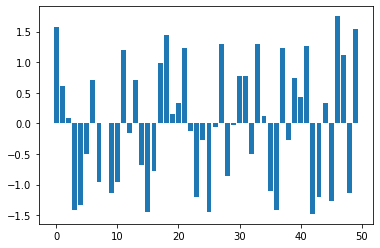

In [10]:
# Let’s compute the z-scores for our previous example
mean = np.mean(val3)
std = np.std(val3)
zscores = []
for val in val3:
    z = (val - mean) / std
    zscores.append(z)

plt.bar(x_pos, zscores)
plt.show()

We say that the dataset is now standardized because it has a mean of 0 and a standard deviation of 1. This can be a very useful property when we want to talk about the scales of different datasets. You will see later in the program that in machine learning it is extremely common to standardize datasets and there are prebuilt standardization packages that do all the work for us.

### Covariance and correlation

Correlation is about a mutual relationship between two datasets. Before we can introduce correlation we must first talk about another concept.

Covariance is a measure of how much two random variables change together. Let X and Y be two random variables. Then the covariance of X and Y is the expected value of the product of the deviations of X and Yfrom their respective mean.

Cov(X,Y)=E[(X-E[X])(Y-E[Y])]=E[XY]-E[X]E[Y]

Let’s decompose the first part of the formula. We start by first centering each random variable by subtracting its mean. We then multiply the centered scores and take the expected value of the product. Notice that covariance can be either positive, negative or zero. 

**Zero correlation does not imply independence.**

Now when the covariance is negative it means that as one value goes up the other goes down. On the other hand, when the covariance is positive it means that an increase in one value causes an increase in the other value. Now magnitude of the covariance indicates exactly how much a change in one value causes a change in the second. When the relationship between two variables is strong, meaning they are very dependent we expect a high magnitude of the covariance.

**But there is a problem interpreting this measure. The problem with covariance is that it keeps the scale of the variables can, therefore, take on any values. **

This is exactly where correlation comes in. It gives us a standardized measure of dependence, meaning that if there is a perfect linear relationship then we will always have a correlation coefficient of 1 or -1.

Then the correlation of X and Y is defined as:

Corr(X,Y)=Cov(X,Y)/\theta_x*\theta_y

It follows directly that two independent variables will always have a correlation of zero. On the other hand, a correlation of 
1 means a perfect linear relationship. And a correlation of -1
 is also reflecting a perfect linear relationship but where an increase in X results in a decrease in Y of the same factor.


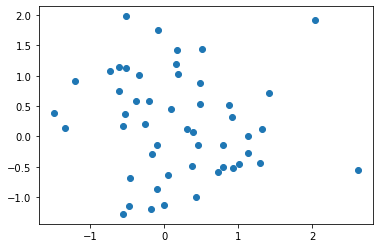

In [11]:
# Suppose we sample two normally distributed random variables as follows

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


X = np.random.randn(1, 50)
Y = np.random.randn(1, 50)
plt.scatter(X, Y)
plt.show()

Since the two sampling are completely independent we do not expect a strong relationship between the variables. The plot seems to confirm this. Let’s now check the correlation. We can use NumPy’s np.corrcoef() function for this.

In [12]:
np.corrcoef(X, Y)

array([[ 1.        , -0.10625566],
       [-0.10625566,  1.        ]])

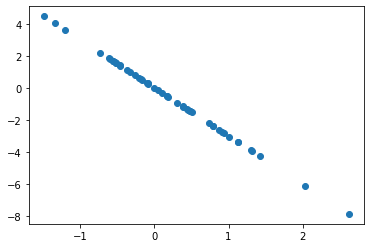

In [13]:
#Correlation between X and 3X

plt.scatter(X, -3 * X)
plt.show()

The plot confirms what we should have expected: the two variables are now completely dependent. There is a full linear relationship between them. Let’s check the correlation matrix



In [14]:
np.corrcoef(X,-3*X)

array([[ 1., -1.],
       [-1.,  1.]])

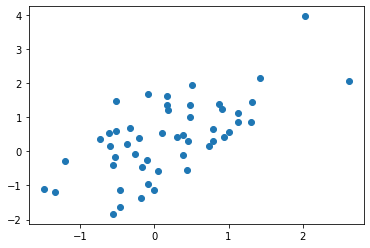

In [15]:
# Correlation between X and X+Y

plt.scatter(X, X + Y)
plt.show()

In [16]:
np.corrcoef(X, X + Y)

array([[1.        , 0.65778263],
       [0.65778263, 1.        ]])

Most of the time you will likely work with data stored in a DataFrame so you might be more interested in the pandas version of correlation so lets define a DataFrame with normally distributed values

In [17]:
# Define the DF
df = pd.DataFrame(np.random.randn(50, 2), columns=list("XY"))

df.head()

,X,Y
0,0.183378,-1.903348
1,-1.091659,-0.992047
2,-1.583920,-1.058772
3,0.081479,0.184277
4,-1.680447,1.579119


We can then get the correlation between the two columns X and Y using the corr function from pandas

In [18]:
df["X"].corr(df["Y"])

-0.18674614050656646

An important thing to realize when talking about correlation is that two random variables can have a correlation of zero but still be dependent. This is because correlation only captures linear relationships, but variables can be related in non-linear ways as well.

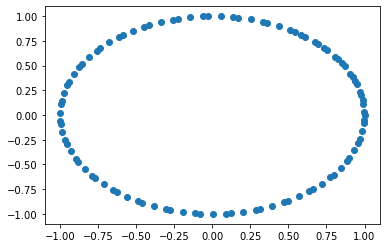

In [19]:
# Example:

t = np.arange(0, 20, 0.2)
X = np.cos(t)
Y = np.sin(t)
plt.scatter(X, Y)
plt.show()

In [20]:
#If we check the correlation of the variables X and Y we will get no correlation, although the correlation between them is clear.
np.corrcoef(X, Y)

array([[1.        , 0.03508976],
       [0.03508976, 1.        ]])

we can see that they have a correlation of almost zero. This is because they are dependent in a non-linear way, and this is not captured by the correlation coefficient.

#### Studying correlations between many random variables
Most of the time we are dealing with more than just two random variables. In such cases, the correlation matrix can be large and difficult to read. For instance, the correlation matrix for only 10 random variables looks like this:

In [22]:
data = np.random.randn(10, 50)
np.corrcoef(data)

array([[ 1.        ,  0.0543799 ,  0.07107496,  0.01374853,  0.32467901,
        -0.02854769,  0.24819869, -0.09142107, -0.12454095, -0.01151825],
       [ 0.0543799 ,  1.        , -0.22895328, -0.02161872,  0.04501213,
        -0.01116091, -0.13306638,  0.10968722, -0.02344129, -0.03320792],
       [ 0.07107496, -0.22895328,  1.        ,  0.11970982, -0.08694741,
         0.18575126, -0.08903503, -0.08431702, -0.1721419 ,  0.14665128],
       [ 0.01374853, -0.02161872,  0.11970982,  1.        ,  0.03591514,
         0.26571567,  0.0472355 , -0.2046538 , -0.01004231, -0.01192224],
       [ 0.32467901,  0.04501213, -0.08694741,  0.03591514,  1.        ,
         0.09784755,  0.33797651, -0.19821627,  0.16128645, -0.15465234],
       [-0.02854769, -0.01116091,  0.18575126,  0.26571567,  0.09784755,
         1.        , -0.13295649,  0.03589553,  0.1565062 , -0.00898118],
       [ 0.24819869, -0.13306638, -0.08903503,  0.0472355 ,  0.33797651,
        -0.13295649,  1.        , -0.1222449 

As you see it is difficult to trace out the correlation coefficients. One quick way to help read the matrix is to plot it with the heatmap() function from seaborn library.

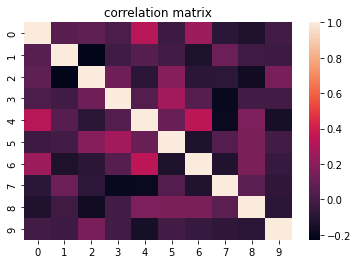

In [23]:
import seaborn as sns

sns.heatmap(np.corrcoef(data))
plt.title('correlation matrix')
plt.show()

The heatmap plot has a lot of functionalities that you can discover. For instance, you can print the correlation coefficients at each cell, change the color, or show only the lower part of the matrix.

The use of the heatmap is not limited to only plotting the correlation matrix. In fact, it can be used to plot rectangular datasets. Let’s look at a few examples using the flights dataset.

In [24]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [25]:
# pivot function for reshaping the values by month and year

flights = flights.pivot("month", "year", "passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


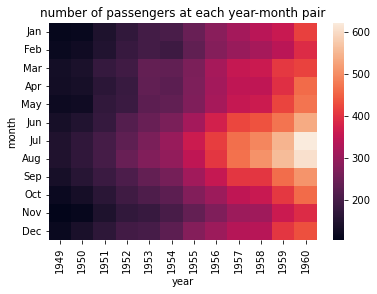

In [26]:
# The resulting dataframe is a rectangular matrix and we can feed it into the heatmap.
sns.heatmap(flights)
plt.title('number of passengers at each year-month pair')
plt.show()


### Point estimates and confidence intervals
#### Point estimates

If we have a random population of size n, and we might calculate the mean of this sample 

point_estimate = sum (1..n) Xi/n

Let’s give this a try with Python. We will need the following imports


In [27]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random

%matplotlib inline

# Generate the samples
poisson1 = stats.poisson.rvs(mu=55, size=200000)
poisson2 = stats.poisson.rvs(mu=10, size=100000)
population = np.concatenate((poisson1, poisson2))
population.mean()

40.00965333333333

In [28]:
# Lets select a random sample of size 1000
sample = np.random.choice(population, size=1000)
# And lets check the mean of the sample
sample_mean = sample.mean()
sample_mean

39.989

Let’s try another example. This time we start with some population of categorical data and we want to estimate the percentage of each group by drawing a small sample. We will start with 100000 total data points which we will separate into four groups depending on color: 50% of them will be red, 30% blue, 10% green and 10% white.

In [29]:
data = (
    (["red"] * 50000) + (["blue"] * 30000) + (["green"] * 10000) + (["white"] * 10000)
)

In [30]:
# Let’s now take a sample of size 100 and estimate the distribution of the colors based on the distribution observed in the sample

sample = random.sample(data, 100)

for color in set(sample):
    print(color + " proportion estimate:")
    print(sample.count(color) / 100)

white proportion estimate:
0.13
red proportion estimate:
0.43
blue proportion estimate:
0.34
green proportion estimate:
0.1


As you can see the distribution of the sample is very close to the true distribution in the population, despite the size of the sample being much smaller than the actual population.

#### Confidence intervals

After we make a point estimate how do we know how much confidence we can have about it? This is where the topic of confidence intervals comes in. Ideally, we would like our estimate to have a small variance for a large sample size since this would imply that it will be accurate with large probability. 

A higher confidence level corresponds to a wider interval since the larger our interval the more sure we can be that the population parameter will indeed fall within our margins of error. 

 So if we speak of a confidence level of 95% it means that with a probability of 0.95 the calculated interval contains the population parameter.

A common practice for the margin of error is based on the standard deviation f the population and a parameter known as the z-critical value.

margin_of_error=z*\theta/n^0.5

where n is the size of the sample

The z-critical value represents the number of standard deviations that we would have to go from the mean of the normal distribution in order to capture the proportion of the points corresponding to our chosen confidence level.

But how do we know what z-critical value we need for our confidence level? For this we can use the function stats.norm.ppf(). If we want a confidence level of 0.95 then we compute the corresponding z-critical value as:

In [32]:
# z- critical values: number of sd that we would have to go from the mean of the normal distribution in order to capture the proportion of the points in the confidence level.
z = stats.norm.ppf(q=0.975)
z

1.959963984540054

Let’s look at our previous example of Poisson random variables. Recall that we created a variable sample of 1000 values from our population and we computed a point estimate for the mean of the population based on the mean of the sample. Let’s now compute the standard deviation of our population in order to set up our confidence intervals.

In [33]:
pop_std = population.std()
pop_std

22.151657879561874

In [34]:
# Using this we can compute the margin of error for a confidence of 95% as
margin_of_error = z * (pop_std / np.sqrt(1000))
margin_of_error

1.3729487511062648

So our confidence interval for our estimate of the population mean is given by subtracting and adding this margin to the point estimate

In [35]:
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
confidence_interval

(38.61605124889373, 41.36194875110626)

**So we can say with 95% confidence that the mean of the population falls in the interval (39.80, 42.54). Note that this interval does indeed capture the population mean in this case**

In [36]:
population.mean()

40.00965333333333

To get a better idea of this we can take several samples and plot the 95% confidence intervals for each one. Let’s say we compute 10 samples. We just repeat the previous steps in a for loop and store the corresponding values.

In [37]:
intervals = []
sample_means = []

for sample in range(10):
    sample = np.random.choice(population, size=1000)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    pop_std = population.std()
    margin_of_error = z * (pop_std / np.sqrt(1000))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    intervals.append(confidence_interval)

And now let’s plot these intervals as vertical error bars around the population mean

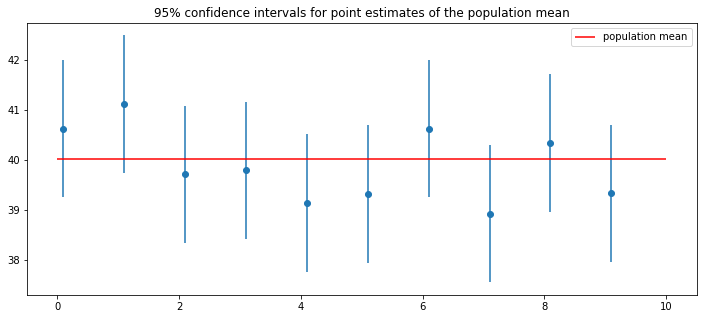

In [38]:
plt.figure(figsize=(12, 5))

plt.errorbar(
    x=np.arange(0.1, 10, 1),
    y=sample_means,
    yerr=[(top - bot) / 2 for top, bot in intervals],
    fmt="o",
)

plt.hlines(xmin=0, xmax=10, y=population.mean(), color="red", label="population mean")
plt.legend()
plt.title("95% confidence intervals for point estimates of the population mean")
plt.show()

We can see that all but one of the intervals overlaps the red line denoting the population mean. There is nothing wrong with the interval that does not overlap. In general, if we ran 100 samples we would expect 95 of the intervals to overlap the mean.

Now, this method for computing confidence intervals relies on actually knowing the standard deviation of the population. But what if this value is not available for us? In this case, we must use yet another point estimate by computing the standard deviation of the sample.

the standard deviation of the population is the standard deviation of the sample, over the square root of the n size of the sample

Of course, if we compute now our confidence interval with this estimate of the deviation instead of the true deviation value. we are introducing yet another source of potential error. In order to account for this, we must use a different type of parameter. Instead of the z-critical value we now use the t-critical value which we can compute once again a function from the stats module.

Let’s look at all of this through the help of our example again. We will work this time with a smaller sample to have more realistic results since normally when using this method the sample size will be much smaller than the population size.

In [39]:
sample_small = np.random.choice(population, size=10)
sample_small_mean = sample_small.mean()
sample_small_mean

35.1

We can compute the t-critical value for a confidence interval of 95% as follows

In [40]:
t = stats.t.ppf(q=0.975, df=9)
t

2.2621571627409915

The second parameter is for the degrees of freedom which has to be equal to the sample size minus 1 in this case. Let’s now compute our estimate for σ together with the confidence intervals

In [41]:
sigma = sample_small.std() / np.sqrt(10)
margin_of_error = t * sigma
confidence_interval = (
    sample_small_mean - margin_of_error,
    sample_small_mean + margin_of_error,
)
confidence_interval

(20.285201998129587, 49.914798001870416)

We can see that this is a much larger interval around our point estimate due to the added error coming from having to estimate the standard deviation of the population. Of course our sample size, in this case, was very small. The higher our sample size in general the more the t-critical value will approach the z-critical value. For example with a sample size of size 10 as we had here we have the following difference between the two values

In [42]:
stats.t.ppf(q=0.975, df=9) - stats.norm.ppf(0.975)


0.3021931782009375

However with a sample size of 1000 as our previous example, we would have

In [43]:
stats.t.ppf(q=0.975, df=999) - stats.norm.ppf(0.975)

0.0023774765933946007

One last thing we would like to point out is that in these examples we have been computing the confidence intervals by hand by subtracting and adding the margin of error to our point estimate. **However, we can do all this directly by using the function stats.t.interval() as follows**

In [44]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 9,                     # Degrees of freedom
                 loc = sample_small_mean,   # Sample mean
                 scale = sigma)             # Standard deviation estimate

(20.285201998129587, 49.914798001870416)

As one final example, let’s compute some confidence intervals for different levels of confidence



In [45]:
for confidence in (0.5, 0.75, 0.8, 0.90, 0.95):
    confidence_interval = stats.t.interval(
        alpha=confidence, df=9, loc=sample_small_mean, scale=sigma
    )
    interval = round(confidence_interval[1] - confidence_interval[0], 2)
    print(confidence, interval)  # 0.95 26.43

0.5 9.2
0.75 16.11
0.8 18.11
0.9 24.01
0.95 29.63


This confirms indeed our intuition from earlier: the higher the confidence the larger the interval has to be. If we are satisfied with only 50% confidence then our interval is only of length 8. However, if we want a higher confidence the interval length increases as well.